In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('./Documents/Rice_Image_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Documents/Rice_Image_Dataset\Rice_Citation_Request.txt
./Documents/Rice_Image_Dataset\Arborio\Arborio (1).jpg
./Documents/Rice_Image_Dataset\Arborio\Arborio (10).jpg
./Documents/Rice_Image_Dataset\Arborio\Arborio (100).jpg
./Documents/Rice_Image_Dataset\Arborio\Arborio (1000).jpg
./Documents/Rice_Image_Dataset\Arborio\Arborio (10000).jpg
./Documents/Rice_Image_Dataset\Arborio\Arborio (10001).jpg
./Documents/Rice_Image_Dataset\Arborio\Arborio (10002).jpg
./Documents/Rice_Image_Dataset\Arborio\Arborio (10003).jpg
./Documents/Rice_Image_Dataset\Arborio\Arborio (10004).jpg
./Documents/Rice_Image_Dataset\Arborio\Arborio (10005).jpg
./Documents/Rice_Image_Dataset\Arborio\Arborio (10006).jpg
./Documents/Rice_Image_Dataset\Arborio\Arborio (10007).jpg
./Documents/Rice_Image_Dataset\Arborio\Arborio (10008).jpg
./Documents/Rice_Image_Dataset\Arborio\Arborio (10009).jpg
./Documents/Rice_Image_Dataset\Arborio\Arborio (1001).jpg
./Documents/Rice_Image_Dataset\Arborio\Arborio (10010).jpg
./Document

./Documents/Rice_Image_Dataset\Basmati\Basmati (1).jpg
./Documents/Rice_Image_Dataset\Basmati\basmati (10).jpg
./Documents/Rice_Image_Dataset\Basmati\basmati (100).jpg
./Documents/Rice_Image_Dataset\Basmati\basmati (1000).jpg
./Documents/Rice_Image_Dataset\Basmati\basmati (10000).jpg
./Documents/Rice_Image_Dataset\Basmati\basmati (10001).jpg
./Documents/Rice_Image_Dataset\Basmati\basmati (10002).jpg
./Documents/Rice_Image_Dataset\Basmati\basmati (10003).jpg
./Documents/Rice_Image_Dataset\Basmati\basmati (10004).jpg
./Documents/Rice_Image_Dataset\Basmati\basmati (10005).jpg
./Documents/Rice_Image_Dataset\Basmati\basmati (10006).jpg
./Documents/Rice_Image_Dataset\Basmati\basmati (10007).jpg
./Documents/Rice_Image_Dataset\Basmati\basmati (10008).jpg
./Documents/Rice_Image_Dataset\Basmati\basmati (10009).jpg
./Documents/Rice_Image_Dataset\Basmati\basmati (1001).jpg
./Documents/Rice_Image_Dataset\Basmati\basmati (10010).jpg
./Documents/Rice_Image_Dataset\Basmati\basmati (10011).jpg
./Docume

./Documents/Rice_Image_Dataset\Ipsala\Ipsala (1).jpg
./Documents/Rice_Image_Dataset\Ipsala\Ipsala (10).jpg
./Documents/Rice_Image_Dataset\Ipsala\Ipsala (100).jpg
./Documents/Rice_Image_Dataset\Ipsala\Ipsala (1000).jpg
./Documents/Rice_Image_Dataset\Ipsala\Ipsala (10000).jpg
./Documents/Rice_Image_Dataset\Ipsala\Ipsala (10001).jpg
./Documents/Rice_Image_Dataset\Ipsala\Ipsala (10002).jpg
./Documents/Rice_Image_Dataset\Ipsala\Ipsala (10003).jpg
./Documents/Rice_Image_Dataset\Ipsala\Ipsala (10004).jpg
./Documents/Rice_Image_Dataset\Ipsala\Ipsala (10005).jpg
./Documents/Rice_Image_Dataset\Ipsala\Ipsala (10006).jpg
./Documents/Rice_Image_Dataset\Ipsala\Ipsala (10007).jpg
./Documents/Rice_Image_Dataset\Ipsala\Ipsala (10008).jpg
./Documents/Rice_Image_Dataset\Ipsala\Ipsala (10009).jpg
./Documents/Rice_Image_Dataset\Ipsala\Ipsala (1001).jpg
./Documents/Rice_Image_Dataset\Ipsala\Ipsala (10010).jpg
./Documents/Rice_Image_Dataset\Ipsala\Ipsala (10011).jpg
./Documents/Rice_Image_Dataset\Ipsala\Ipsa

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
import tensorflow as tf
import keras
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation,Dropout
from keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import pathlib
import random
import glob
from skimage import io

In [3]:
data_dir = './Documents/Rice_Image_Dataset'
data_dir

'./Documents/Rice_Image_Dataset'

In [4]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('Documents/Rice_Image_Dataset')

In [5]:
arborio = list(data_dir.glob('Arborio/*'))[:600]
basmati = list(data_dir.glob('Basmati/*'))[:600]
ipsala = list(data_dir.glob('Ipsala/*'))[:600]
jasmine = list(data_dir.glob('Jasmine/*'))[:600]
karacadag = list(data_dir.glob('Karacadag/*'))[:600]

In [6]:
data = {
    'arborio': arborio,
    'basmati':basmati,
    'ipsala':ipsala,
    'jasmine':jasmine,
    'karacadag':karacadag
}
rice_labels = {
    1:'Arborio',
    2:'Basmati',
    3:'Ipsala',
    4:'Jasmine',
    5:'Karacadag'
}

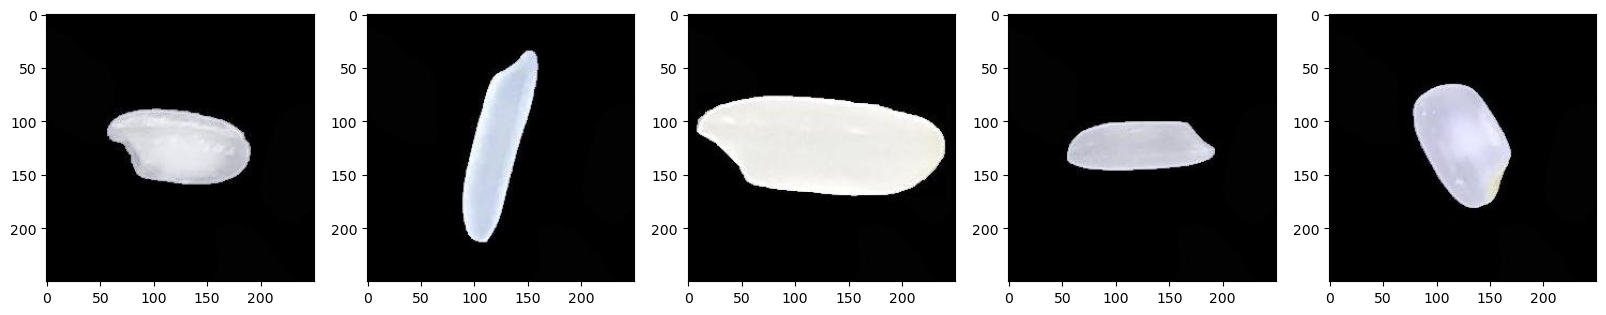

In [7]:
fig, ax = plt.subplots(ncols = 5,figsize = (20,5))
arborio_image = img.imread(arborio[0])
basmati_image = img.imread(basmati[0])
ipsala_image = img.imread(ipsala[0])
jasmine_image = img.imread(jasmine[0])
karacadag_image = img.imread(karacadag[0])

ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

In [8]:
train_gen = ImageDataGenerator(rescale = 1/255,validation_split = 0.2)
train_data = train_gen.flow_from_directory(
    data_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training')

test_data = train_gen.flow_from_directory(
    data_dir,
    target_size =(224,224),
    shuffle = False,
    subset = 'validation')

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [9]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size=(3,3),activation = 'relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(16,activation = 'relu',))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(5,activation = 'softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 16)                6308368   
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                        

In [11]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['acc'])

In [12]:
cnn_model = model.fit(train_data,epochs = 3,validation_data = test_data,shuffle = True)

Epoch 1/3
1875/1875 [==============================] - 1116s 594ms/step - loss: 0.1740 - acc: 0.9392 - val_loss: 0.0605 - val_acc: 0.9806
Epoch 2/3
1875/1875 [==============================] - 949s 506ms/step - loss: 0.0569 - acc: 0.9830 - val_loss: 0.0553 - val_acc: 0.9811
Epoch 3/3
1875/1875 [==============================] - 1153s 615ms/step - loss: 0.0358 - acc: 0.9889 - val_loss: 0.0596 - val_acc: 0.9835


In [13]:
y_pred = model.predict(test_data)
m_y_pred = np.argmax(y_pred)

469/469 [==============================] - 108s 230ms/step


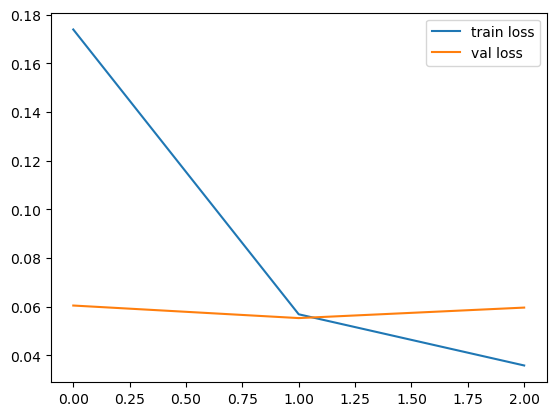

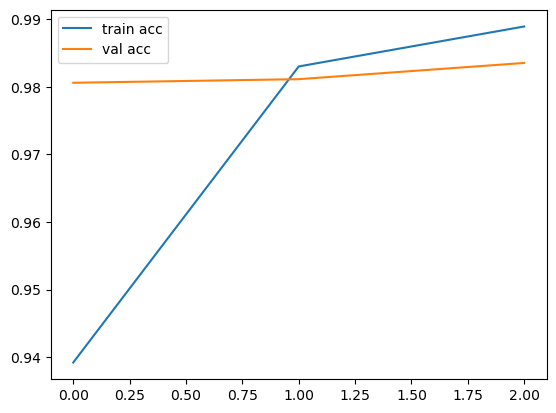

In [17]:
# plot the loss
plt.plot(cnn_model.history['loss'], label='train loss')
plt.plot(cnn_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plot the accuracy
plt.plot(cnn_model.history['acc'], label='train acc')
plt.plot(cnn_model.history['val_acc'], label='val acc')
plt.legend()
plt.show()